In [1]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'pima-indians-diabetes.csv'

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불러온 데이터셋을 적용합니다. 이 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv(my_data,
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
# names는 각각의 속성의 이름을 지정해준다. my_data는 파일 경로이다.

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


피마 인디언들의 당뇨병 여부를 예측하는 프로그램이다.

샘플 수는 768개이고, 속성이 8개 인것을 알 수 있다. 그리고 클래스는 1 혹은 0으로 구분된다.

각각의 속성은 `df = pd.read_csv(my_data,
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])`로 구분한다.

pandas.read_csv는 라벨이 붙은 2차원 배열(그냥 표라고 생각하자)를 반환한다.

In [2]:
# 처음 5줄을 봅니다.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


csv는 comma separated values file의 약자로, 콤마로 구분된 데이터의 모음이다.
보통은 데이터를 설명하는 한줄이 파일 맨 처음에 있는데, 이 파일에는 없다.

In [3]:
# 데이터의 전반적인 정보, 각 속성의 특징을 살펴본다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# 속성 값에 통계적 특징 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


count는 샘플의 개수 mean은 평균, std는 표준편차를 의미한다. 각 퍼센티지는 하위 기준으로 백분위로 해당하는 샘플의 개수를 의미한다.

In [5]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['plasma', 'class']])
print(df[['pregnant', 'class']])

     plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]
     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [6]:
# 데이터를 가공하여 어떤 데이터를 취급할 지 생각해야한다.
# 어떤 속성이 당뇨병 발생과 상관관계가 있는 지 살펴야한다.

# 임신 회수와 당뇨병 발병의 확률
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


groupby() : pregnant 정보를 기준으로하는 새 그룹을 만든다.

as_index=False : pregnant 왼쪽에 새로운 인덱스를 만든다. 없어도 된다.

mean() : 평균을 구하고 그에 대한 2차원 데이터 구조를 반환한다. std()와 같은 것도 가능.

sort_values() : pregnant 칼럼을 오름차순으로 정렬한다.

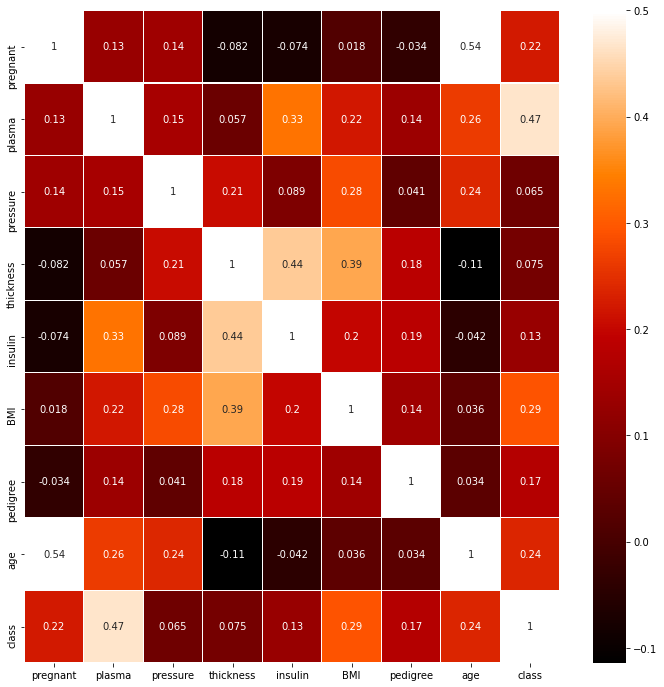

In [7]:
# 그래프를 통해 한눈에 속성간 상관관계를 살핀다.
# matplotlib, sseaborn을 사용한다.

# 데이터 간의 상관관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# heatmap이 항목간 상관관계를 잘 나타낸다.
# 상관관계가 없으면 0 있으면 1
# 그래프의 속성을 결정합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

df.corr에 관한 레퍼런스
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
상관관계 행렬을 반환한다.

seabon.heatmap에 대한 레퍼런스
https://seaborn.pydata.org/generated/seaborn.heatmap.html

```
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
```
에서

df.corr()는 df의 상관관계 행렬을 반환한다.

linewidths는 그래프의 각 셀의 간격을 조정한다.

vmax는 색상의 값을 고정한다.
vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.

cmap은 matplotlib 색상의 설정값을 불러온다.

annot은 각 칸에 df.corr이 들어가도록 하는 것이다.


----

그래프로 나온 결과를 보면 밝을 수록 숫자가 높은 것을 확인 할 수 있고, plasma가 당뇨와 가장 상관관계가 높다는 것을 알 수 있다.

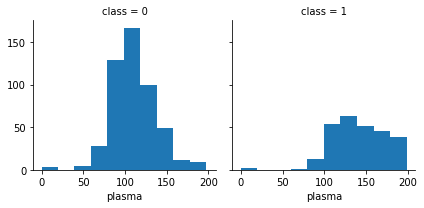

In [8]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

sns.FacetGrid의 레퍼런스
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

`grid = sns.FacetGrid(df, col='class')`
첫번째 인자인 df는 각 열이 변수이고 각 행이 관측 대상인 것이 되어야한다.
col, row에 들어가는 string은 각기 다른 곳에 그려질 변수명을 적어줘야한다. 같은 col에는 같은 class가 들어가게 된다.

sns.FacetGrid.map의 레퍼런스
https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html

`grid.map(plt.hist, 'plasma',  bins=10)`
각 facetGrid에 그림을 그린다.
plt.hist : 히스토그램으로 그린다.
'plasma' : plasma라는 이름의 data를 기준으로 그린다.
bins=10 : 히스토그램의 막대기는 10개

pyplot.show()의 레퍼런스. 딱히 볼 필요는 없다.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

당뇨병 환자의 경우 plasma 항목의 수치가 150이상인 사람이 많다.
이렇게 데이터 전처리 과정을 마친다.

※
보통 데이터 전처리 과정은, omit된 데이터를 평균/중앙값으로 대치하는 과정, 관계없는 데이터가 없는 지 확인하는 과정 등이 포함된다.

SVM, RF등의 머신러닝 기법은 중요 속성을 뽑아 내는 FEATURE EXTRACTION 과정도 데이터 전처리에 포함하지만, 딥러닝은 중요 속성을 내부적으로 추출하므로 데이터 전처리 시에 해당 작업을 할 필요는 없다.

In [14]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt(my_data, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #입력 + 은닉층
model.add(Dense(8, activation='relu')) # 은닉층
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11

```
numpy.random.seed(3)
tf.random.set_seed(3)
```
에서 seed값을 설정하는다는 것은 난수표에서 몇 번째 테이블을 불러와 슬지 정하는 것과 같다. 따라서 seed 값이 같으면 똑같은 랜덤 값을 출력한다.

단 이렇게 seed 값을 설정해도 출력 값이 약간 다를 수 있는데, cuDNN 등의 내부 커널이 난수표를 자체 생성하기 때문이다.
이런 부분까지 seed로 지정할 수는 없으므로 최종적인 딥러닝 결과는 여러번 실행하여 평균을 구하는 것이 좋다.



`tf.keras.Sequential()`의 공식문서를 살펴보자
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


```
model = Sequential(layers, name)
```
은 클래스를 의미한다.

```
model.add(layer)
```
메서드는 Layer를 추가한다.

----

```
model.compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, **kwargs)
```
는 학습 전 모델에 대한 환경설청을 한다.
여기서 metric은 평가될 대상을 의미한다.

```
model.fit(X, Y, epochs=200, batch_size=10)

fit(
    x=None, y=None, batch_size=None, epochs=1, verbose='auto',
    callbacks=None, validation_split=0.0, validation_data=None, shuffle=True,
    class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)
```
는 epoch의 수 만큼 train을 감행한다.
batch_size의 수 만큼 배치를 추출해서 확률적 경사하강법을 실행한다.


```
model.evaluate(X, Y)[1] # 인덱스 0은 loss, 1은 accuracy를 뱉는다.

evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, e_multiprocessing=False, return_dict=False, **kwargs)
```
는 오차 값과 compile에서 정한 metrics의 값을 반환한다.
